In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np

In [67]:
movie = pd.read_csv('../data/movie.csv')

In [68]:
med_budget = movie.groupby('title_year')['budget'].median() / 1e6

In [69]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()

In [70]:
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [71]:
years = med_budget_roll.index.values

In [72]:
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [73]:
budget = med_budget_roll.values

In [74]:
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

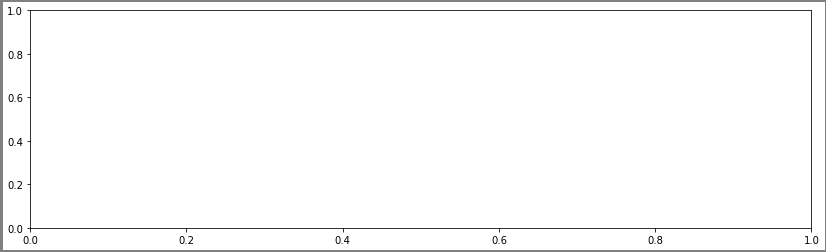

In [75]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5,
 edgecolor='.5')


In [76]:
ax.plot(years, budget, linestyle='--',
 linewidth=3, color='.2', label='All Movies')

In [77]:
text_kwargs=dict(fontsize=20, family='cursive')

In [78]:
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

Text(3.200000000000003, 0.5, 'Millions of Dollars')

In [79]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [80]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [81]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()


In [82]:
fifth_year = (years % 5 == 0) & (years >= 1970)

In [83]:
years_5 = years[fifth_year]

In [84]:
ct_5 = ct[fifth_year]

In [85]:
ct_norm_5 = ct_norm[fifth_year]

In [86]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5',
 alpha=.3, label='Movies per Year')


<BarContainer object of 10 artists>

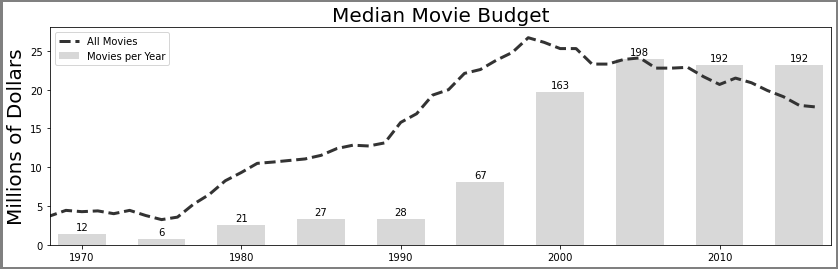

In [87]:
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [88]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [89]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

In [90]:
 fifth_year = (years % 5 == 0) & (years >= 1970)

In [91]:
years_5 = years[fifth_year]
years_5

array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
       2015.])

In [92]:
ct_5 = ct[fifth_year]
ct_5

array([ 12,   6,  21,  27,  28,  67, 163, 198, 192, 192], dtype=int64)

In [93]:
ct_norm_5 = ct_norm[fifth_year]
ct_norm_5

array([ 1.44977376,  0.72488688,  2.53710407,  3.26199095,  3.38280543,
        8.09457014, 19.69276018, 23.92126697, 23.19638009, 23.19638009])

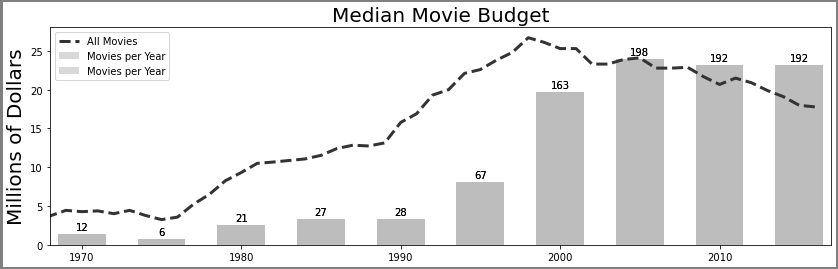

In [94]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [95]:
top10 = movie.sort_values('budget', ascending=False) \
 .groupby('title_year')['budget'] \
 .apply(lambda x: x.iloc[:10].median() / 1e6)


In [96]:
top10_roll = top10.rolling(5, min_periods=1).mean()

In [97]:
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

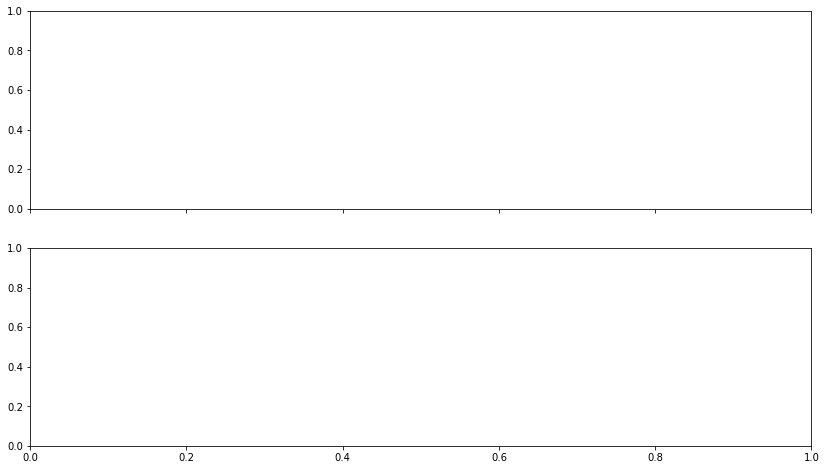

In [98]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,8),
sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

In [99]:
ax1.plot(years, budget, linestyle='--', linewidth=3,
 color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5',
 alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

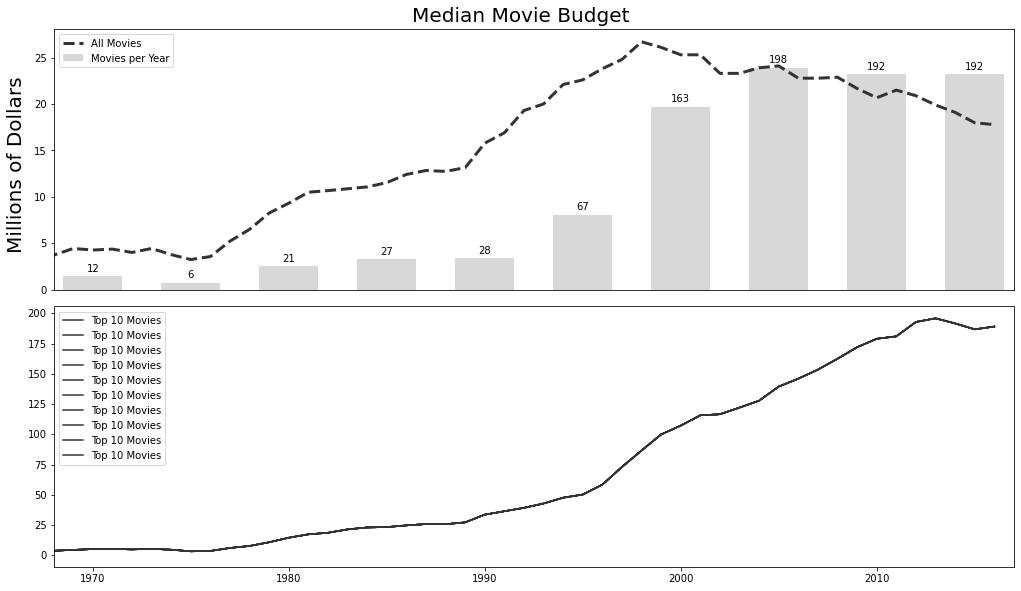

In [100]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')
    ax2.plot(years, top10_roll.values, color='.2',
    label='Top 10 Movies')
ax2.legend(loc='upper left')
fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical',
ha='center', **text_kwargs)
fig2

In [101]:
import os
path = os.path.expanduser('~/Desktop/movie_budget.png')
fig2.savefig(path, bbox_inches='tight')

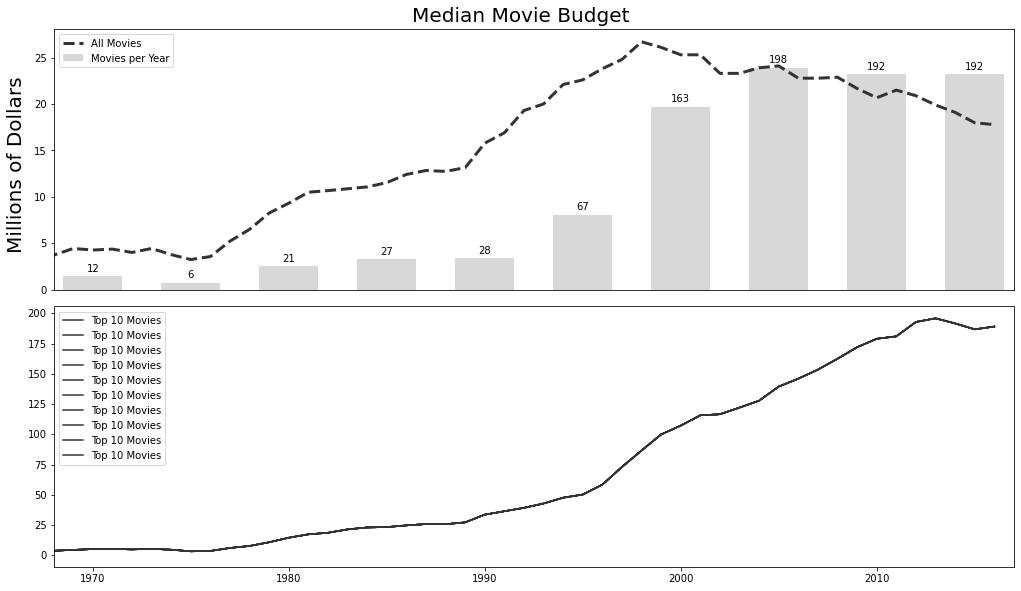

In [102]:
fig2

In [103]:
med_budget.loc[2012:2016].mean()

17.78

In [104]:
med_budget.loc[2011:2015].mean()

17.98

In [105]:
med_budget.loc[2010:2014].mean()

19.1

In [106]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movie[cols].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

In [108]:
movie_samp.head()

,budget,title_year,imdb_score,movie_title,budget2
351,90000000.0,2001.0,6.6,Rush Hour 2,90.0
1714,30000000.0,2014.0,5.7,Grace of Monaco,30.0
1599,30000000.0,2012.0,7.4,Looper,30.0
2321,20000000.0,2014.0,4.8,Dwegons and Leprechauns,20.0
2492,17000000.0,2003.0,6.9,Veronica Guerin,17.0


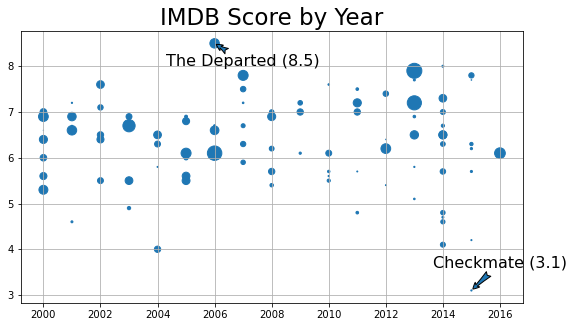

In [117]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x='title_year', y='imdb_score',
 s='budget2', data=movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score),
    xytext=(year + 1, score + offset),
    s=title + ' ({})'.format(score),
    ha='center',
    size=16,
    arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=23)
ax.grid(True)